In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform

Using TensorFlow backend.


### Данные:
Будем работать с датасетом [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). 

In [2]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

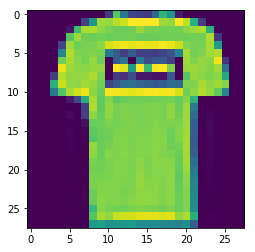

In [3]:
plt.imshow(X_train[1].reshape([28,28]))

### Задание:
Будем решать задачу классификации на 10 классов. Каждый класс соответствует одному из типов одежды. Исходная размерность признакового пространства: `784`, каждый пиксель является признаком. Будем снижать размерность признакового пространства с помощью метода главных компонент (`PCA`). Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа главных компонент. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа главных компонент.

In [4]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
pca = PCA(n_components=3)
used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
lr = LogisticRegression()
lr.fit(X_train_lowdim, y_train[used_indices])
accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784]))))

0.5779

Используйте следующую сетку числа главных компонент: `[3, 5, 7, 12, 18, 25, 33, 40, 48, 55]`. Для ускорения сходимости можете семплировать подвыборки из `X_train`. 

### Решение:

Строим график зависимости качества от числа главных компонент.

In [36]:
n_comp = np.array([3, 5, 7, 12, 18, 25, 33, 40, 48, 55])

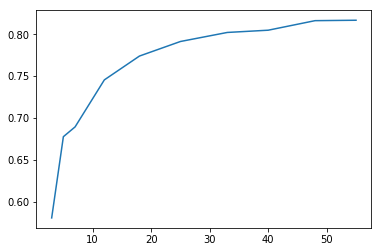

In [37]:
def accuracy_value(n_comp):
    """Returns accuracy value for PCA method"""
    
    output = np.empty(n_comp.shape[0])
    
    for idx in range(n_comp.shape[0]):        
        pca = PCA(n_components=n_comp[idx])
        used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
        X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
        lr = LogisticRegression()
        lr.fit(X_train_lowdim, y_train[used_indices])
        output[idx] = accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784]))))
    
    return output

accuracy_values = accuracy_value(n_comp)

plt.plot(n_comp, accuracy_values)
plt.show()

Пока без оформления и оценки дисперсии